In [16]:
from dataset import GetMedMNIST
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torchvision.transforms as transforms

d_size = 28

data_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.detach().numpy()),
])

test_dataloader = GetMedMNIST(name='PathMNIST', split='test', size=d_size, hf=False, transform=data_transform)

test_loader = DataLoader(test_dataloader, batch_size=len(test_dataloader.dataset))
test_x, test_y = next(iter(test_loader))[0].reshape(-1, d_size**2), next(iter(test_loader))[1].detach().numpy()

In [17]:
tnse = TSNE(n_components=2)
test_x_2d = tnse.fit_transform(test_x)

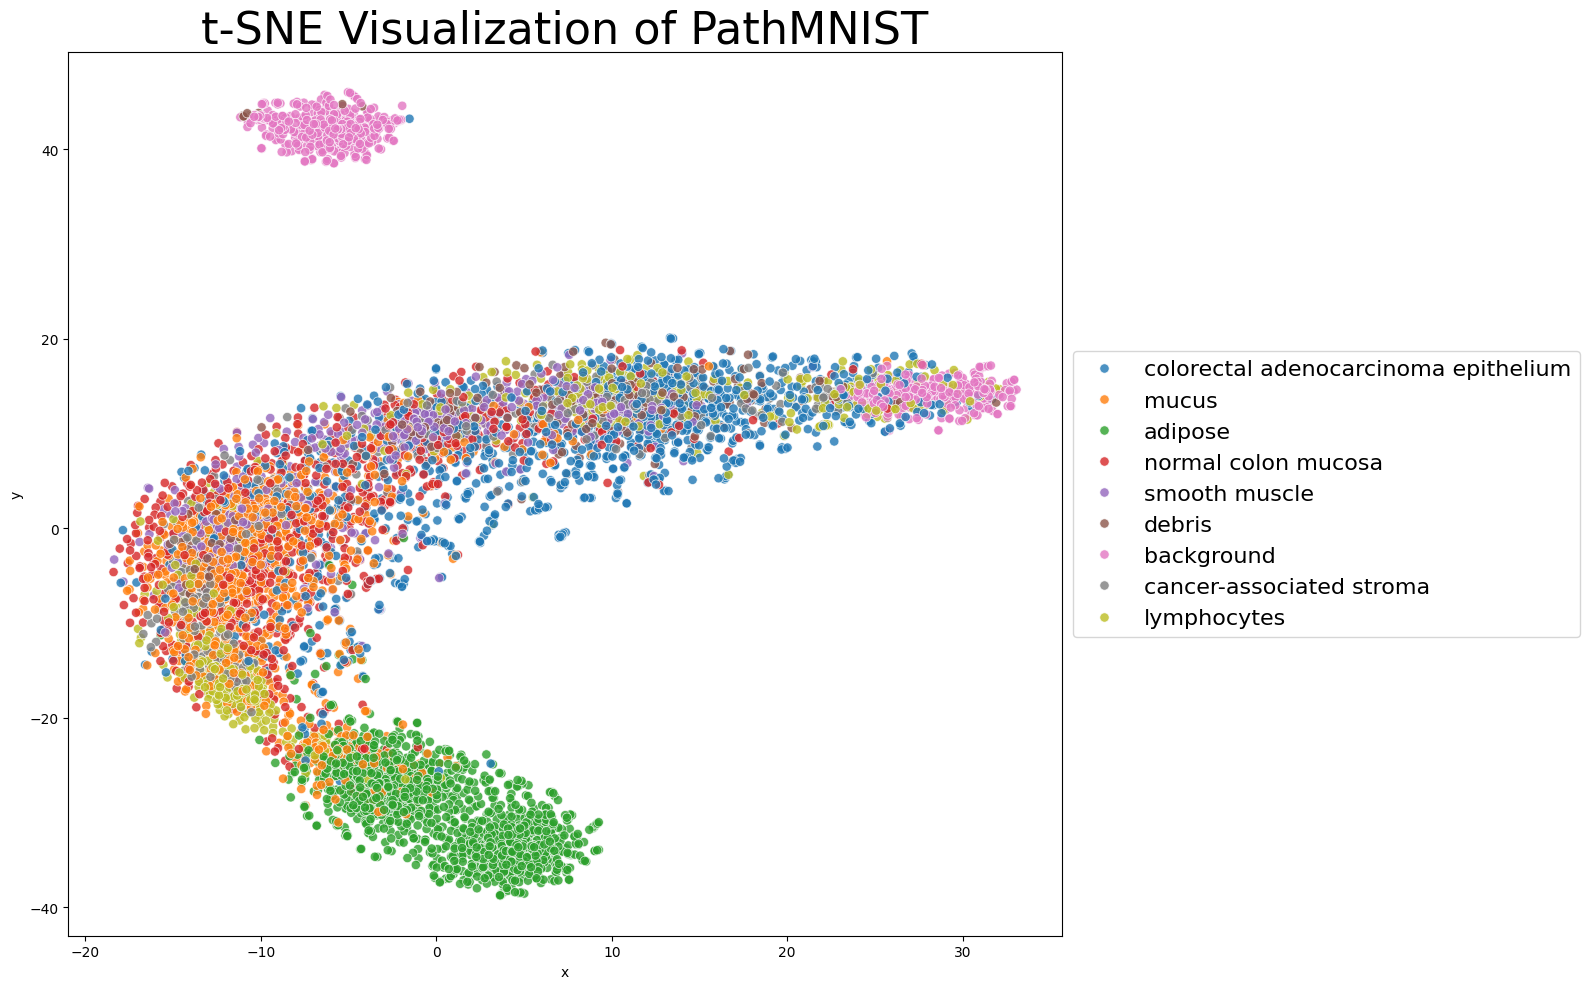

In [26]:
class_labels = {
    0: 'adipose',
    1: 'background',
    2: 'debris',
    3: 'lymphocytes',
    4: 'mucus',
    5: 'smooth muscle',
    6: 'normal colon mucosa',
    7: 'cancer-associated stroma',
    8: 'colorectal adenocarcinoma epithelium'
}

df = pd.DataFrame({
    'x': test_x_2d[:, 0],
    'y': test_x_2d[:, 1],
    'label': test_y.reshape(-1)
})
df['label_name'] = df['label'].map(class_labels)

plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='x', y='y', hue='label_name', palette='tab10', s=45, alpha=0.8)
plt.title('t-SNE Visualization of PathMNIST', fontsize=32)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.tight_layout()
plt.show()
